<a href="https://colab.research.google.com/github/sushma-snk/Fruit_Classification/blob/main/Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

In [2]:
# ! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/moltean/fruits'
od.download(dataset_url)

Skipping, found downloaded files in "./fruits" (use force=True to force download)


In [14]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
data_dir = '/content/fruits/fruits-360_dataset/fruits-360/Training'

file_names=os.listdir(data_dir)
pd.DataFrame(file_names,columns=['Names'])

,Names
0,Apple Red 2
1,Huckleberry
2,Apple Golden 3
3,Pear 2
4,Physalis with Husk
...,...
126,Kiwi
127,Potato Red
128,Cactus fruit
129,Apple Red Delicious


In [6]:
# size_number=[]
# size=[]
# for file in file_names:
#     path=os.path.join(data_dir,file)
#     size_number.append(len(os.listdir(path)))
#     for img in os.listdir(path):
#         image=cv2.imread(os.path.join(path,img))
#         size.append(image.shape)
# pd.DataFrame(size_number,columns=['size'],index=file_names)   

In [7]:
train_image=[]
label=[]
for file in file_names:
    path=os.path.join(data_dir,file)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        train_image.append(image)
        label.append(file)
pd.DataFrame(label,columns=['label']) 

,label
0,Apple Red 2
1,Apple Red 2
2,Apple Red 2
3,Apple Red 2
4,Apple Red 2
...,...
67687,Pear Kaiser
67688,Pear Kaiser
67689,Pear Kaiser
67690,Pear Kaiser


In [8]:
train_image=np.array(train_image)
label=np.array(label)

In [9]:
label_encoding={}
label_uniqe=list(pd.unique(label))
for i in range(131):
    label_encoding[label_uniqe[i]]=i
label_encoding

{'Apple Red 2': 0,
 'Huckleberry': 1,
 'Apple Golden 3': 2,
 'Pear 2': 3,
 'Physalis with Husk': 4,
 'Tomato not Ripened': 5,
 'Lemon Meyer': 6,
 'Apple Granny Smith': 7,
 'Pepino': 8,
 'Cantaloupe 2': 9,
 'Beetroot': 10,
 'Tamarillo': 11,
 'Pomelo Sweetie': 12,
 'Grape Pink': 13,
 'Tomato 3': 14,
 'Mandarine': 15,
 'Apple Red 3': 16,
 'Pear Forelle': 17,
 'Mango': 18,
 'Melon Piel de Sapo': 19,
 'Pear Stone': 20,
 'Nut Forest': 21,
 'Pitahaya Red': 22,
 'Maracuja': 23,
 'Banana': 24,
 'Cauliflower': 25,
 'Potato Red Washed': 26,
 'Cherry Wax Black': 27,
 'Tomato Heart': 28,
 'Mangostan': 29,
 'Tomato Maroon': 30,
 'Pear Red': 31,
 'Cherry Rainier': 32,
 'Cherry 1': 33,
 'Onion Red': 34,
 'Grapefruit White': 35,
 'Banana Lady Finger': 36,
 'Fig': 37,
 'Ginger Root': 38,
 'Pear Abate': 39,
 'Mango Red': 40,
 'Grape Blue': 41,
 'Tomato 1': 42,
 'Plum': 43,
 'Guava': 44,
 'Peach Flat': 45,
 'Lemon': 46,
 'Tomato Yellow': 47,
 'Kohlrabi': 48,
 'Pear Williams': 49,
 'Cherry Wax Red': 50,
 '

In [10]:
def get_Name(N):
    for x,y in label_encoding.items():
          if y==N:
                return x
label2=[]
for i in label:
    label2.append(label_encoding[i])
label2=np.array(label2)
pd.DataFrame(label2)

,0
0,0
1,0
2,0
3,0
4,0
...,...
67687,130
67688,130
67689,130
67690,130


In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_image, label2, test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60922, 100, 100, 3)
X_test shape is  (6770, 100, 100, 3)
y_train shape is  (60922,)
y_test shape is  (6770,)


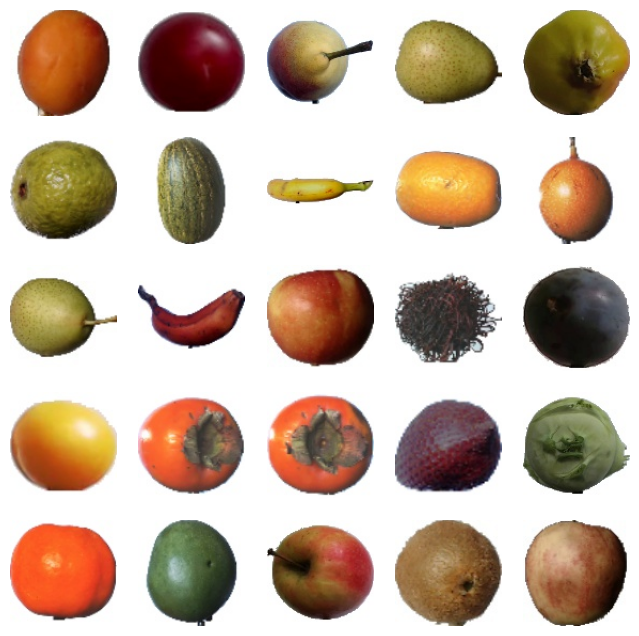

In [12]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1, xticks=[], yticks=[])
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
    plt.axis("off")
plt.show()

In [16]:
shape=(100,100,3)
num_class=len(file_names)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((3,3))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(num_class,activation=tf.nn.softmax))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 64)      

In [18]:
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1904/1904 [==============================] - 1129s 591ms/step - loss: 1.2620 - accuracy: 0.6490
Epoch 2/10
1904/1904 [==============================] - 1064s 559ms/step - loss: 0.3188 - accuracy: 0.8954
Epoch 3/10
1904/1904 [==============================] - 1080s 567ms/step - loss: 0.2220 - accuracy: 0.9280
Epoch 4/10
1904/1904 [==============================] - 1109s 582ms/step - loss: 0.1745 - accuracy: 0.9447
Epoch 5/10
1904/1904 [==============================] - 1102s 579ms/step - loss: 0.1547 - accuracy: 0.9519
Epoch 6/10
1904/1904 [==============================] - 1118s 587ms/step - loss: 0.1325 - accuracy: 0.9597
Epoch 7/10
1904/1904 [==============================] - 1120s 588ms/step - loss: 0.1198 - accuracy: 0.9652
Epoch 8/10
1904/1904 [==============================] - 1106s 581ms/step - loss: 0.1093 - accuracy: 0.9675
Epoch 9/10
1904/1904 [==============================] - 1095s 575ms/step - loss: 0.1066 - accuracy: 0.9692
Epoch 10/10
1904/1904 [==============

In [19]:
# Saving the  model to use it later on

classifier_model = model.to_json()
with open("/gdrive/My Drive/unikaksha/mini_projects/Fruit_Classification/Fruit_Classification_Model.json", "w") as json_file:
    json_file.write(classifier_model)
model.save_weights("/gdrive/My Drive/unikaksha/mini_projects/Fruit_Classification/Fruit_Classification_Model.h5")

<Figure size 640x480 with 0 Axes>

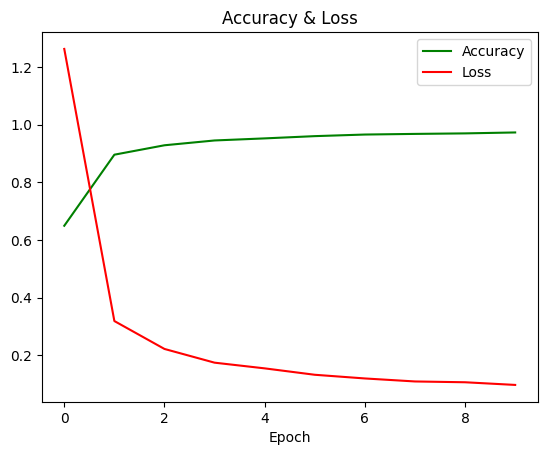

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(hist.history['accuracy'], 'green', label='Accuracy')
plt.plot(hist.history['loss'], 'red', label='Loss')
plt.title('Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(["Accuracy", "Loss"], loc ="upper right")
plt.figure()

In [21]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

212/212 [==============================] - 35s 165ms/step - loss: 0.0818 - accuracy: 0.9734
Test Loss = 0.08177143335342407
Test Accuracy = 0.9734120965003967


In [22]:
y_pred = model.predict(X_test)

212/212 [==============================] - 32s 150ms/step


In [23]:
pred_Name=[]
pred_number=[]
for j in y_pred:
    N=np.argmax(j)
    pred_Name.append(get_Name(N))
    pred_number.append(N)
pd.DataFrame(pred_Name,columns=['pred Names']) 

,pred Names
0,Avocado
1,Chestnut
2,Apple Crimson Snow
3,Pear Monster
4,Onion White
...,...
6765,Peach 2
6766,Apricot
6767,Fig
6768,Pear Abate


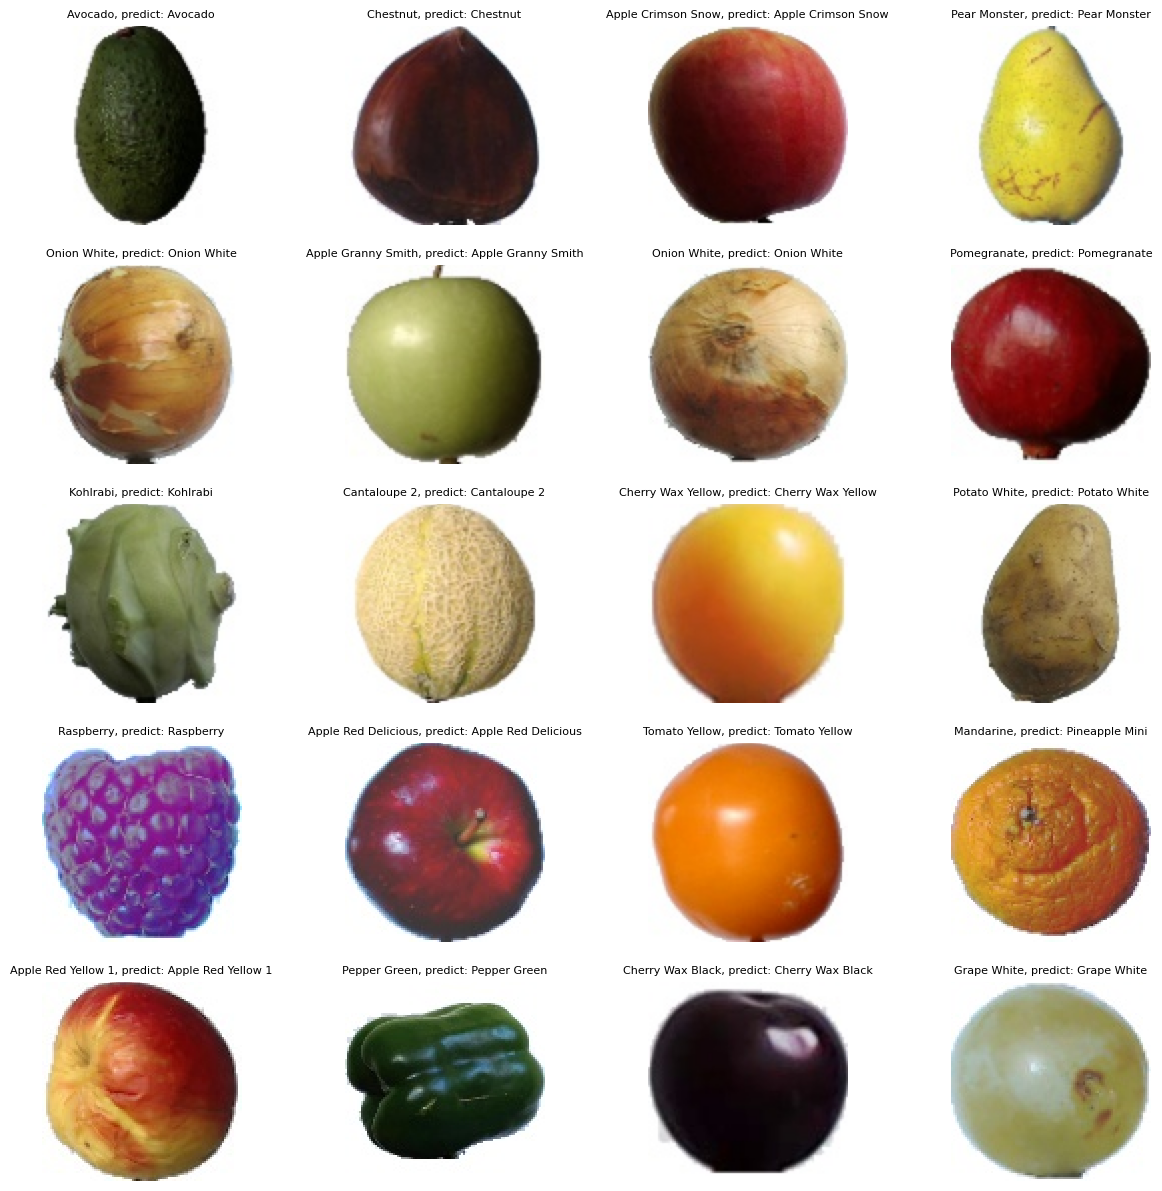

In [32]:
plt.figure(figsize=(15,15))
# n=1
for i in range(20):
    plt.subplot(5, 4, i+1, xticks=[], yticks=[])
    plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    labels = get_Name(y_test[i])+', predict: '+ pred_Name[i]
    plt.title(labels,fontsize=8)
    # n+=1

In [34]:
ClassificationReport = classification_report(y_test, pred_number)
print('Classification Model Summary ', ClassificationReport )

Classification Model Summary                precision    recall  f1-score   support

           0       1.00      0.88      0.94        52
           1       1.00      1.00      1.00        51
           2       0.68      1.00      0.81        55
           3       1.00      1.00      1.00        70
           4       0.85      1.00      0.92        53
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        51
           7       1.00      0.50      0.67        52
           8       0.98      1.00      0.99        41
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        55
          12       1.00      1.00      1.00        51
          13       1.00      1.00      1.00        55
          14       1.00      1.00      1.00        71
          15       1.00      0.95      0.97        57
          16       1.00      1.00      1.00        